
## 분석목표
#### 연령대와 커피 취향 사이 상관관계


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('GACTT_RESULTS_ANONYMIZED.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 118 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(97)
memory usage: 3.6+ MB


In [4]:
df.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Gender,Gender (please specify),Marital Status,Household Income,Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,What kind of flavorings do you add?,What kind of flavorings do you add? (Vanilla Syrup),What kind of flavorings do you add? (Caramel Syrup),What kind of flavorings do you add? (Hazelnut Syrup),What kind of flavorings do you add? (Cinnamon (Ground or Stick)),What kind of flavorings do you add? (Peppermint Syrup),What kind of flavorings do you add? (Other),What other flavoring do you use?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,...,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3938.000000,3798.000000,...,3789.000000,3780.000000,3767.000000,3773.000000,3764.000000,3751.000000,3766.000000,3767.000000,3765.000000,3764.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.693499,2.141127,...,3.310900,3.013228,2.223786,3.068646,3.071998,2.366836,3.064790,2.162729,3.858167,3.375930
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.948867,0.947163,...,1.185953,0.992875,0.865389,1.113546,0.999267,0.921048,1.128431,1.081546,1.007973,1.452504
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.dtypes

Submission ID                      object
Respondent ID                      object
Submitted at                       object
What is your age?                  object
What is your ZIP code?             object
                                    ...  
Ethnicity/Race                     object
Ethnicity/Race (please specify)    object
Employment Status                  object
Number of Children                 object
Political Affiliation              object
Length: 118, dtype: object

In [7]:
df.isnull().sum()

Submission ID                         0
Respondent ID                         0
Submitted at                          0
What is your age?                    31
What is your ZIP code?               78
                                   ... 
Ethnicity/Race                      624
Ethnicity/Race (please specify)    3937
Employment Status                   623
Number of Children                 3186
Political Affiliation               753
Length: 118, dtype: int64

In [8]:
df.columns[df.isnull().sum() >= 2000]

Index(['How else do you brew coffee at home?',
       'On the go, where do you typically purchase coffee?',
       'On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))',
       'On the go, where do you typically purchase coffee? (Local cafe)',
       'On the go, where do you typically purchase coffee? (Drive-thru)',
       'On the go, where do you typically purchase coffee? (Specialty coffee shop)',
       'On the go, where do you typically purchase coffee? (Deli or supermarket)',
       'On the go, where do you typically purchase coffee? (Other)',
       'Where else do you purchase coffee?',
       'Please specify what your favorite coffee drink is',
       'What else do you add to your coffee?',
       'What kind of dairy do you add?',
       'What kind of dairy do you add? (Whole milk)',
       'What kind of dairy do you add? (Skim milk)',
       'What kind of dairy do you add? (Half and half)',
       'What kind of dairy do you add? (Coffee 

In [9]:
set(df['Gender (please specify)'])

{'Cis',
 'Gender queer',
 "I'm offended by the question",
 'Male + female',
 'Male/Female couple',
 'Nonbinary woman',
 'Transgender Female',
 'Transgender Female ',
 'Transmasc Genderqueer',
 'bi-gender',
 nan,
 'no',
 'working on this one'}

In [10]:
set(df['Ethnicity/Race (please specify)'])

{'1/2 White & 1/2 Hispanic',
 '50|50 White/Asian',
 'AR-15',
 'Africa American and European ',
 'Alaskan native',
 'American',
 'Arab',
 'Asian Indian',
 'Asian White Mix',
 'Asian and White',
 'Asian and white',
 'Asian, Caucasian ',
 'Asian, White',
 'Asian/Caucasian',
 'Asian/White',
 'Asian/white biracial ',
 'Bi-ethnic (Indian, German)',
 'Bi-racial',
 'Biracial (Asian, White)',
 'Biracial (Asian/Pacific Islander and White/Caucasian)',
 'Biracial, Black and White',
 'Black and asian',
 'Cajun/Native American',
 'Caucasian ',
 'Caucasion and Latino',
 "Doesn't matter",
 'Egyptian',
 'Half white, half south asian',
 'Hispanic, Asian',
 'Hispanic/Asian',
 'Huge mix ',
 'Indian',
 'Japanese Bolivian ',
 'Jewish',
 'Korean',
 'Mexican and Japanese',
 'Middle Eastern',
 'Middle Eastern/Arab',
 'Middle eastern',
 'Middle-eastern',
 'Mix',
 'Mix of white/asian',
 'Mixed',
 'Mixed - Asian and Black',
 'Mixed Asian American',
 'Mixed Asian Caucasian ',
 'Mixed Ethnicity ',
 'Mixed race',
 '

In [11]:
data=set(df['What kind of dairy do you add?'])
{str(j).strip() for i in data for j in str(i).split(',')}

{'Almond milk',
 'Coffee creamer',
 'Flavored coffee creamer',
 'Half and half',
 'Oat milk',
 'Skim milk',
 'Soy milk',
 'Whole milk',
 'nan'}

In [12]:
set(df['What kind of dairy do you add? (Whole milk)'])

{False, True, nan}

In [13]:
col=df.columns
col_1 = [i for i in col if 'What kind of' in i]
col_1

['What kind of dairy do you add?',
 'What kind of dairy do you add? (Whole milk)',
 'What kind of dairy do you add? (Skim milk)',
 'What kind of dairy do you add? (Half and half)',
 'What kind of dairy do you add? (Coffee creamer)',
 'What kind of dairy do you add? (Flavored coffee creamer)',
 'What kind of dairy do you add? (Oat milk)',
 'What kind of dairy do you add? (Almond milk)',
 'What kind of dairy do you add? (Soy milk)',
 'What kind of dairy do you add? (Other)',
 'What kind of sugar or sweetener do you add?',
 'What kind of sugar or sweetener do you add? (Granulated Sugar)',
 'What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))',
 'What kind of sugar or sweetener do you add? (Honey)',
 'What kind of sugar or sweetener do you add? (Maple Syrup)',
 'What kind of sugar or sweetener do you add? (Stevia)',
 'What kind of sugar or sweetener do you add? (Agave Nectar)',
 'What kind of sugar or sweetener do you add? (Brown Sugar)',
 'What kind of suga

In [15]:
col_0=['What is your age?']
col_2 = [i for i in col if 'Where do you' in i]
col_3 = [i for i in col if 'How do you' in i]
col_4 = [i for i in col if 'Do you usually' in i]
col_0.extend(col_1+col_2+col_3+col_4)

In [16]:
col_x=( 'What kind of dairy do you add?', 'What kind of sugar or sweetener do you add?', 'Where do you typically drink coffee?', 
           'How do you brew coffee at home?', 'Do you usually add anything to your coffee?','What kind of flavorings do you add?')

In [17]:
col = [i for i in col_0 if i not in col_x]
col

['What is your age?',
 'What kind of dairy do you add? (Whole milk)',
 'What kind of dairy do you add? (Skim milk)',
 'What kind of dairy do you add? (Half and half)',
 'What kind of dairy do you add? (Coffee creamer)',
 'What kind of dairy do you add? (Flavored coffee creamer)',
 'What kind of dairy do you add? (Oat milk)',
 'What kind of dairy do you add? (Almond milk)',
 'What kind of dairy do you add? (Soy milk)',
 'What kind of dairy do you add? (Other)',
 'What kind of sugar or sweetener do you add? (Granulated Sugar)',
 'What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))',
 'What kind of sugar or sweetener do you add? (Honey)',
 'What kind of sugar or sweetener do you add? (Maple Syrup)',
 'What kind of sugar or sweetener do you add? (Stevia)',
 'What kind of sugar or sweetener do you add? (Agave Nectar)',
 'What kind of sugar or sweetener do you add? (Brown Sugar)',
 'What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado))',
 'What k

In [18]:
df=df[col]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 44 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   What is your age?                                                                         4011 non-null   object 
 1   What kind of dairy do you add? (Whole milk)                                               1699 non-null   object 
 2   What kind of dairy do you add? (Skim milk)                                                1699 non-null   object 
 3   What kind of dairy do you add? (Half and half)                                            1699 non-null   object 
 4   What kind of dairy do you add? (Coffee creamer)                                           1699 non-null   object 
 5   What kind of dairy do you add? (Flavored coffee creamer

In [19]:
df_1 = df.dropna(subset=['What is your age?'])
df_2 = df_1.fillna(False)

C:\Users\senbo\AppData\Local\Temp\ipykernel_33700\3968683272.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2 = df_1.fillna(False)


In [20]:
df_2

,What is your age?,What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),...,How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other)
0,18-24 years old,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,25-34 years old,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,25-34 years old,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,35-44 years old,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,25-34 years old,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,>65 years old,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4038,>65 years old,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4039,18-24 years old,False,False,False,True,True,True,False,False,False,...,True,False,False,False,True,True,True,False,True,False
4040,25-34 years old,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4011 entries, 0 to 4041
Data columns (total 44 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   What is your age?                                                                         4011 non-null   object
 1   What kind of dairy do you add? (Whole milk)                                               4011 non-null   bool  
 2   What kind of dairy do you add? (Skim milk)                                                4011 non-null   bool  
 3   What kind of dairy do you add? (Half and half)                                            4011 non-null   bool  
 4   What kind of dairy do you add? (Coffee creamer)                                           4011 non-null   bool  
 5   What kind of dairy do you add? (Flavored coffee creamer)           

## EDA

In [23]:
for i in col[1:]:
    total_age = df_2.groupby('What is your age?')[i].value_counts()
    print(total_age)

What is your age?  What kind of dairy do you add? (Whole milk)
18-24 years old    False                                           345
                   True                                            116
25-34 years old    False                                          1562
                   True                                            424
35-44 years old    False                                           760
                   True                                            200
45-54 years old    False                                           252
                   True                                             50
55-64 years old    False                                           154
                   True                                             33
<18 years old      False                                            10
                   True                                             10
>65 years old      False                                            82
              

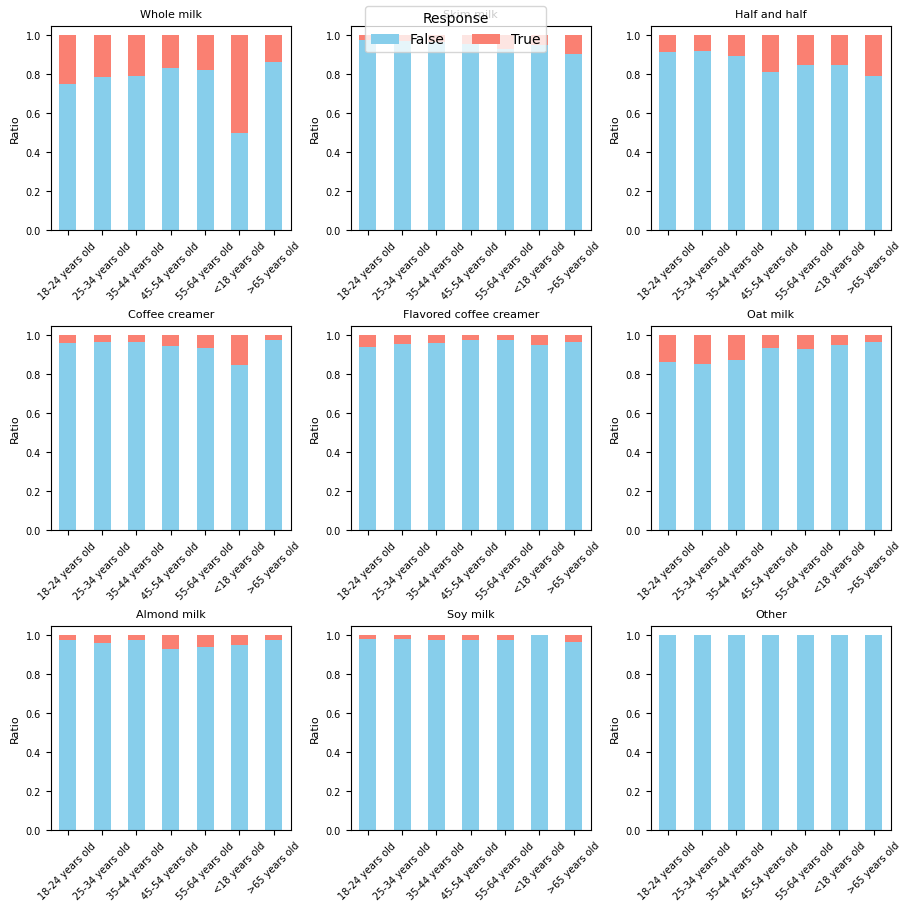

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9), constrained_layout=True)

col_1 = [i for i in col if 'What kind of dairy' in i]

for i, ax in zip(col_1, axes.flatten()):
    total_age_table = df_2.groupby(['What is your age?', i]).size().unstack(fill_value=0)
    total_age_table = total_age_table.astype(float)
    total_age_table = total_age_table.div(total_age_table.sum(axis=1), axis=0)
    match = re.search(r'\((.*?)\)', i)
    title = match.group(1) if match else i
    total_age_table.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'], legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('Ratio', fontsize=8)
    ax.set_title(title, fontsize=8) 
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['False', 'True'], title='Response', loc='upper center', ncol=2, fontsize=10)

plt.show()


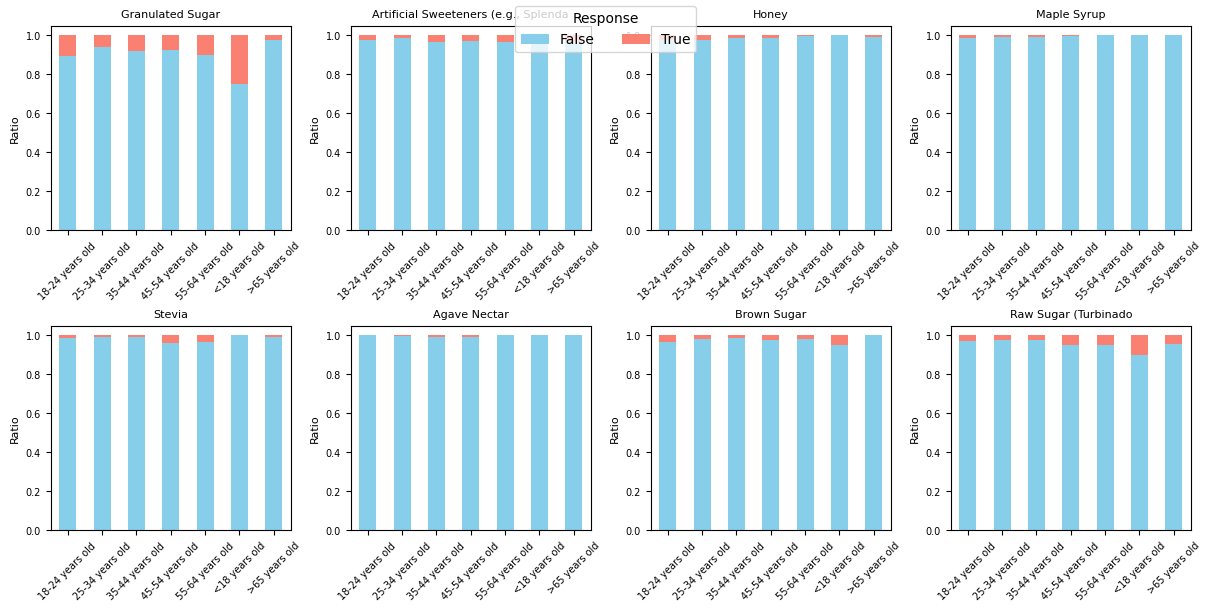

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6), constrained_layout=True)

col_1 = [i for i in col if 'What kind of sugar' in i]

for i, ax in zip(col_1, axes.flatten()):
    total_age_table = df_2.groupby(['What is your age?', i]).size().unstack(fill_value=0)
    total_age_table = total_age_table.astype(float)
    total_age_table = total_age_table.div(total_age_table.sum(axis=1), axis=0)
    match = re.search(r'\((.*?)\)', i)
    title = match.group(1) if match else i
    total_age_table.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'], legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('Ratio', fontsize=8)
    ax.set_title(title, fontsize=8)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['False', 'True'], title='Response', loc='upper center', ncol=2, fontsize=10)

plt.show()


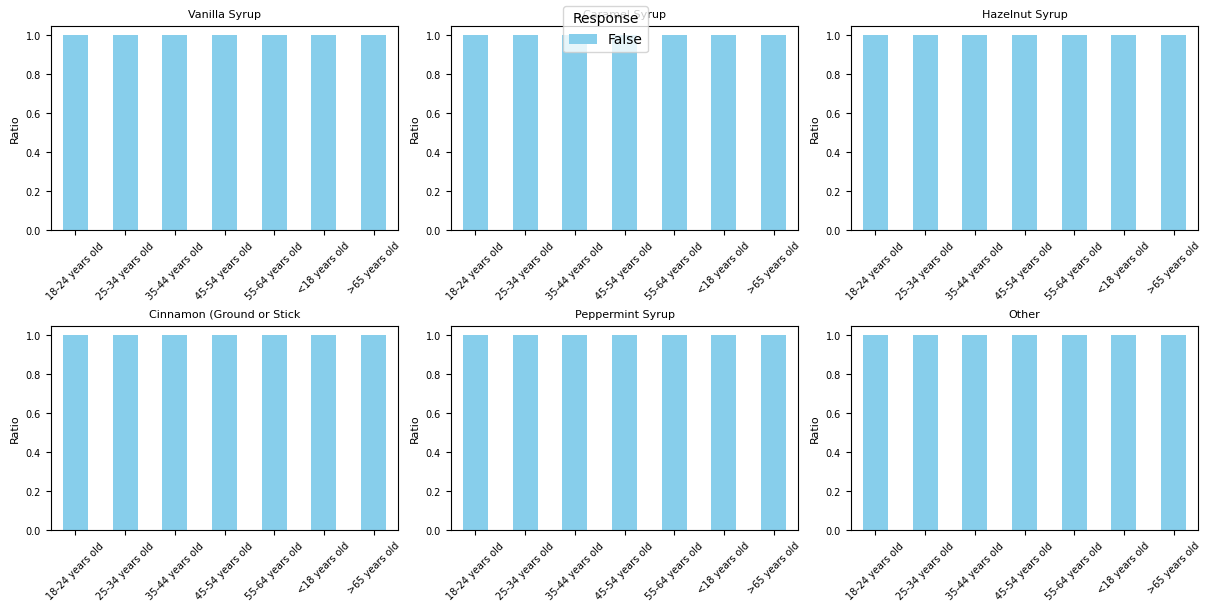

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout=True)

col_1 = [i for i in col if 'What kind of flavorings' in i]

for i, ax in zip(col_1, axes.flatten()):
    total_age_table = df_2.groupby(['What is your age?', i]).size().unstack(fill_value=0)
    total_age_table = total_age_table.astype(float)
    total_age_table = total_age_table.div(total_age_table.sum(axis=1), axis=0)
    match = re.search(r'\((.*?)\)', i)
    title = match.group(1) if match else i
    total_age_table.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'], legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('Ratio', fontsize=8)
    ax.set_title(title, fontsize=8)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['False', 'True'], title='Response', loc='upper center', ncol=2, fontsize=10)

plt.show()


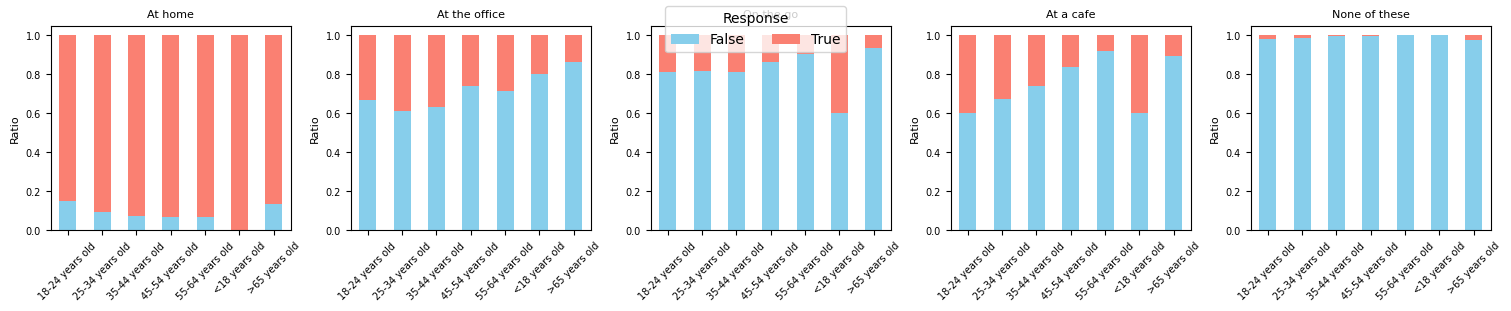

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), constrained_layout=True)

col_1 = [i for i in col if 'Where do you typically' in i]

for i, ax in zip(col_1, axes.flatten()):
    total_age_table = df_2.groupby(['What is your age?', i]).size().unstack(fill_value=0)
    total_age_table = total_age_table.astype(float)
    total_age_table = total_age_table.div(total_age_table.sum(axis=1), axis=0)
    match = re.search(r'\((.*?)\)', i)
    title = match.group(1) if match else i
    total_age_table.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'], legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('Ratio', fontsize=8)
    ax.set_title(title, fontsize=8)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['False', 'True'], title='Response', loc='upper center', ncol=2, fontsize=10)

plt.show()


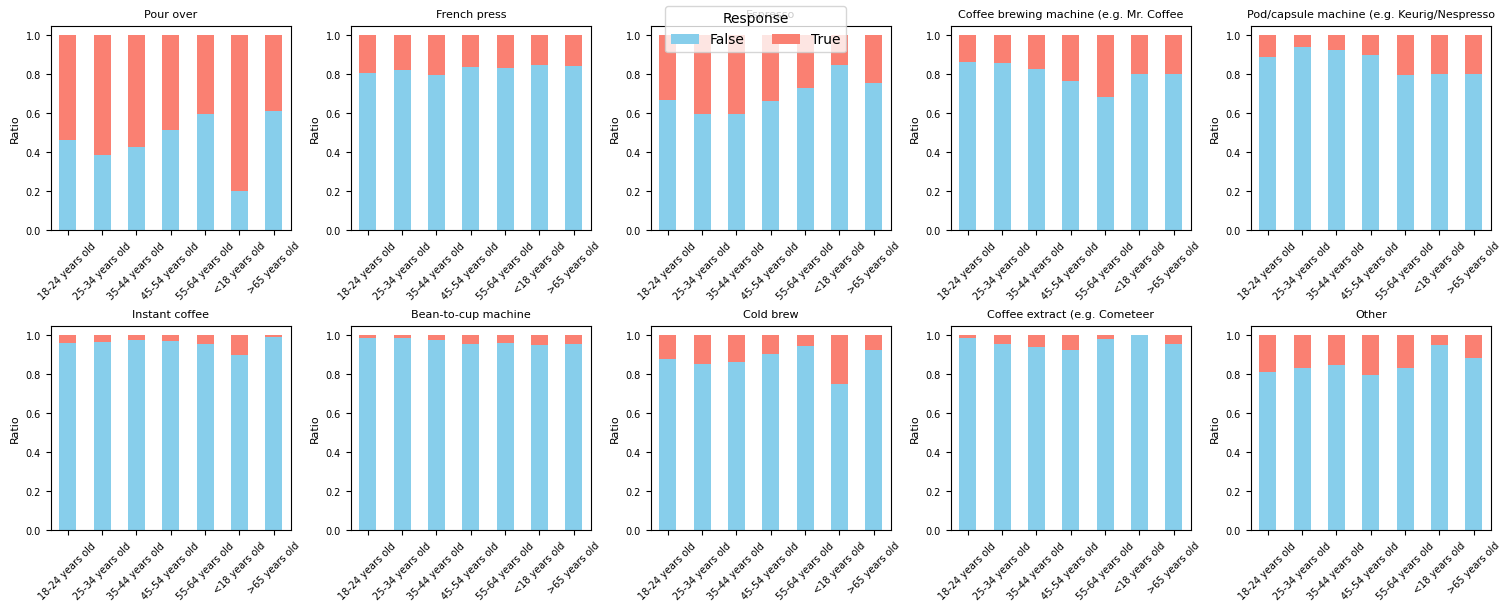

In [28]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6), constrained_layout=True)

col_1 = [i for i in col if 'How do you brew' in i]

for i, ax in zip(col_1, axes.flatten()):
    total_age_table = df_2.groupby(['What is your age?', i]).size().unstack(fill_value=0)
    total_age_table = total_age_table.astype(float)
    total_age_table = total_age_table.div(total_age_table.sum(axis=1), axis=0)
    match = re.search(r'\((.*?)\)', i)
    title = match.group(1) if match else i
    total_age_table.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'], legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('Ratio', fontsize=8)
    ax.set_title(title, fontsize=8)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['False', 'True'], title='Response', loc='upper center', ncol=2, fontsize=10)

plt.show()


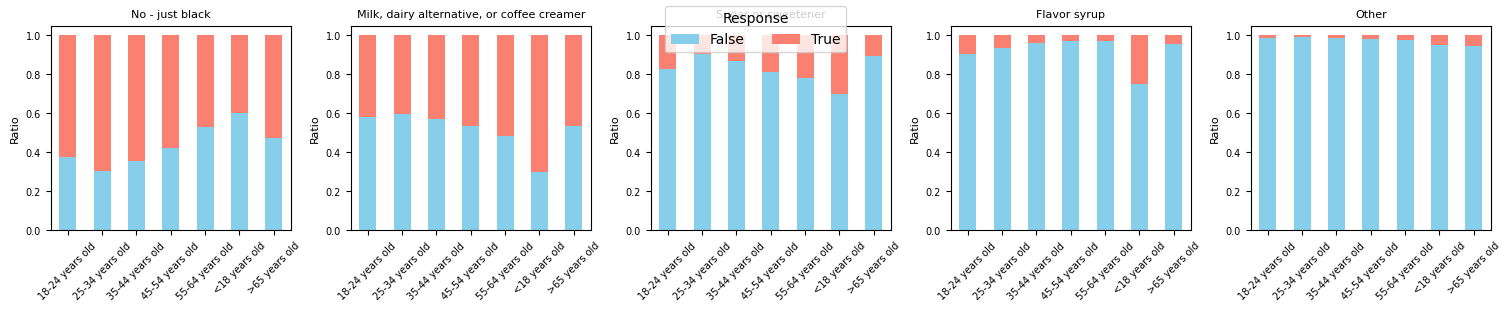

In [29]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), constrained_layout=True)

col_1 = [i for i in col if 'Do you usually add' in i]

for i, ax in zip(col_1, axes.flatten()):
    total_age_table = df_2.groupby(['What is your age?', i]).size().unstack(fill_value=0)
    total_age_table = total_age_table.astype(float)
    total_age_table = total_age_table.div(total_age_table.sum(axis=1), axis=0)
    match = re.search(r'\((.*?)\)', i)
    title = match.group(1) if match else i
    total_age_table.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'], legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('Ratio', fontsize=8)
    ax.set_title(title, fontsize=8)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['False', 'True'], title='Response', loc='upper center', ncol=2, fontsize=10)

plt.show()


In [30]:
encoder = LabelEncoder()
df_2['Age_Label'] = encoder.fit_transform(df_2['What is your age?'])
print(df_2[['What is your age?', 'Age_Label']])

     What is your age?  Age_Label
0      18-24 years old          0
1      25-34 years old          1
2      25-34 years old          1
3      35-44 years old          2
4      25-34 years old          1
...                ...        ...
4037     >65 years old          6
4038     >65 years old          6
4039   18-24 years old          0
4040   25-34 years old          1
4041   25-34 years old          1

[4011 rows x 2 columns]


In [31]:
col_1 = [i for i in col if 'What kind of flavorings' in i]
a=['What is your age?', 'What kind of dairy do you add? (Other)']
col_1.extend(a)

In [32]:
df_3 = df_2.drop(columns=col_1)
df_3 = df_3.astype(int)
df_3

,What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",...,How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),Age_Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,6
4038,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6
4039,0,0,0,1,1,1,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0
4040,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


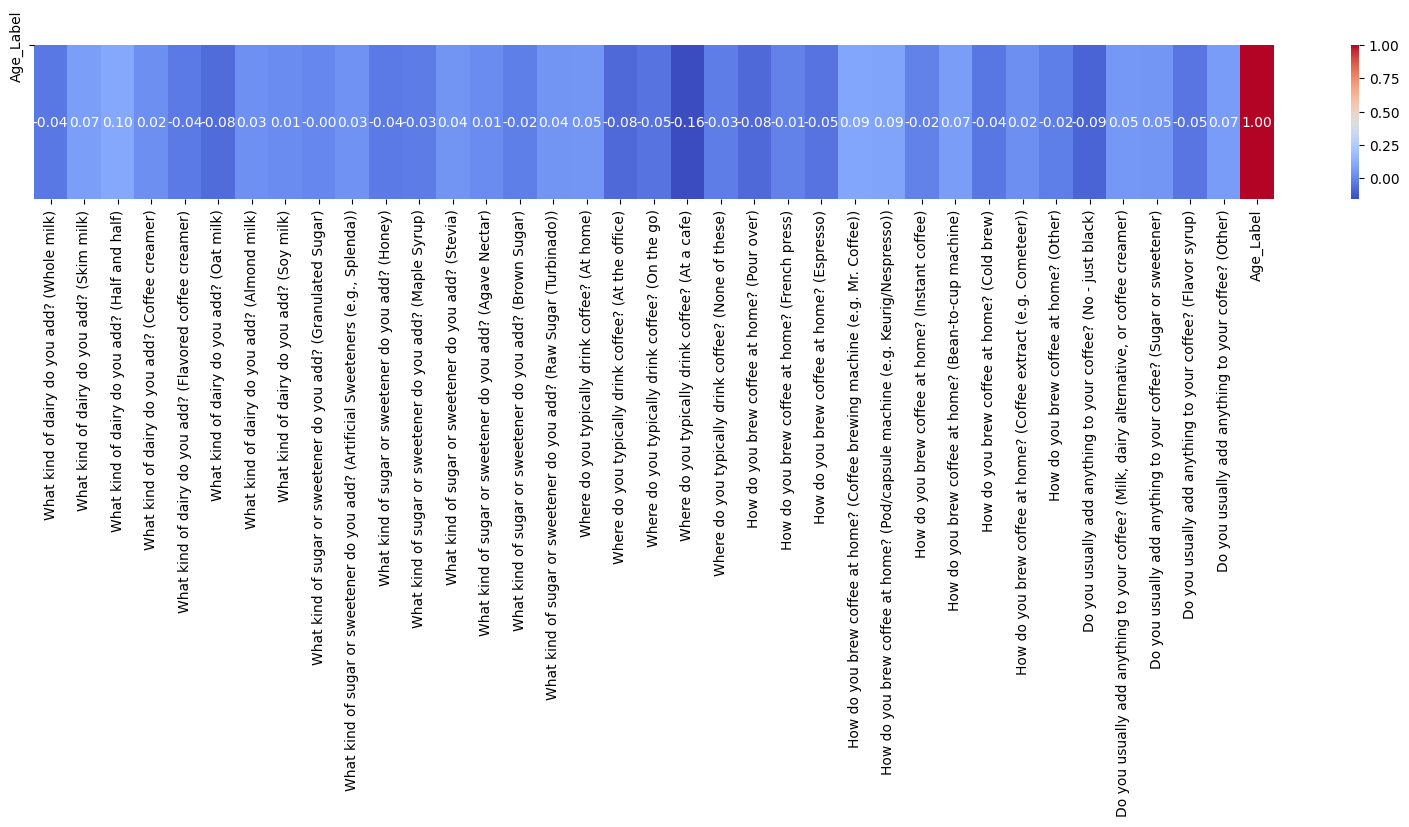

In [68]:
cor = df_3.corr()['Age_Label'].to_frame().T
plt.figure(figsize=(20, 2))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.yticks([0], ['Age_Label'])
plt.show()


연령대와 커피 취향 사이 특이한 상관관계가 없다.